In [1]:
import numpy as np 
import pandas as pd
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [2]:
df = pd.read_csv("../input/gtd/globalterrorismdb_0718dist.csv", encoding="ISO-8859-1")

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
cols=['iday','iyear','extended','vicinity','crit1','crit2','crit3','multiple','suicide','property','ishostkid','ransom','targtype1','attacktype1','weaptype1'] #columns to be selected
for col in cols:
    analysis = df.groupby(col).success.value_counts()
    stat, p, dof, expected = chi2_contingency(analysis.unstack())
    prob = 0.95
    critical = chi2.ppf(prob, dof)
    print(col)
    print('dof=%d' % dof)
    print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
    if abs(stat) >= critical:
        print('Dependent (reject H0)')
    else:
        print('Independent (fail to reject H0)')
    alpha = 1.0 - prob
    print('significance=%.3f, p=%.3f' % (alpha, p))
    if p <= alpha:
        print('Dependent,so we have to reject H0')
    else:
        print('Independent, so we cant reject reject H0')
    print('\n')

iday
dof=31
probability=0.950, critical=44.985, stat=93.820
Dependent (reject H0)
significance=0.050, p=0.000
Dependent,so we have to reject H0


iyear
dof=46
probability=0.950, critical=62.830, stat=3640.912
Dependent (reject H0)
significance=0.050, p=0.000
Dependent,so we have to reject H0


extended
dof=1
probability=0.950, critical=3.841, stat=973.303
Dependent (reject H0)
significance=0.050, p=0.000
Dependent,so we have to reject H0


vicinity
dof=2
probability=0.950, critical=5.991, stat=nan
Independent (fail to reject H0)
significance=0.050, p=nan
Independent, so we cant reject reject H0


crit1
dof=1
probability=0.950, critical=3.841, stat=20.611
Dependent (reject H0)
significance=0.050, p=0.000
Dependent,so we have to reject H0


crit2
dof=1
probability=0.950, critical=3.841, stat=32.481
Dependent (reject H0)
significance=0.050, p=0.000
Dependent,so we have to reject H0


crit3
dof=1
probability=0.950, critical=3.841, stat=33.858
Dependent (reject H0)
significance=0.050, p=0.0

/opt/conda/lib/python3.6/site-packages/scipy/stats/contingency.py:243: RuntimeWarning: invalid value encountered in less
  if np.any(observed < 0):


In [68]:
gname_count=dict()
for i in range(len(df['success'])):
    if df['gname'][i] not in gname_count:
        gname_count[df['gname'][i]]=[0,0]
    gname_count[df['gname'][i]][0]+=1
    if df['success'][i]==1:
        gname_count[df['gname'][i]][1]+=1


In [92]:
l=[[],[],[]]
#l[0] stores names, l[1] stores corresponding group's number of attacks, l[2] stores number of successful attacks
for name in gname_count:
    if gname_count[name][0]>1000 and name!='Unknown':
        l[0].append(name)
        l[1].append(gname_count[name][0])
        l[2].append(gname_count[name][1])
print(len(gname_count))
print(len(l[0]))

3537
19


In [94]:
group_success_rate=[]
for i in range(len(l[0])):
    group_success_rate.append(l[2][i]*100/l[1][i])

In [100]:
#sorting in decreasing order based on total number of attacks
for i in range(len(l[0])):
    for j in range(i+1,len(l[0])):
        if(l[1][i]<l[1][j]):
            temp=l[1][i]
            temp2=l[0][i]
            temp3=l[2][i]
            temp4=group_success_rate[i]
            l[1][i]=l[1][j]
            l[0][i]=l[0][j]
            l[2][i]=l[2][j]
            group_success_rate[i]=group_success_rate[j]
            l[1][j]=temp
            l[0][j]=temp2
            l[2][j]=temp3
            group_success_rate[j]=temp4


Text(0, 0.5, 'Number of Attacks')

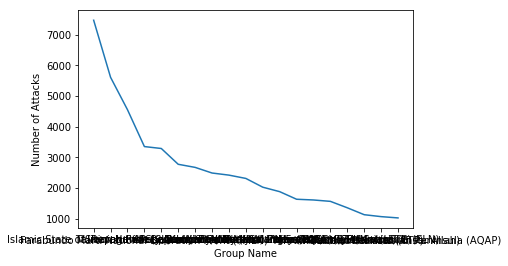

In [102]:
import matplotlib.pyplot as plt 
plt.plot(l[0],l[1])
plt.xlabel('Group Name')
plt.ylabel('Number of Attacks')


In [103]:
for i in range(len(l[0])):
    print(l[0][i],group_success_rate[i])

Taliban 89.32869751270393
Islamic State of Iraq and the Levant (ISIL) 84.7853197933369
Shining Path (SL) 95.21405049396267
Farabundo Marti National Liberation Front (FMLN) 98.98537749925396
Al-Shabaab 91.72749391727494
New People's Army (NPA) 88.63636363636364
Irish Republican Army (IRA) 85.43616622987645
Revolutionary Armed Forces of Colombia (FARC) 92.56131885806192
Boko Haram 92.92803970223325
Kurdistan Workers' Party (PKK) 94.15584415584415
Basque Fatherland and Freedom (ETA) 85.0296442687747
Communist Party of India - Maoist (CPI-Maoist) 94.46219382321618
Maoists 80.30674846625767
Liberation Tigers of Tamil Eelam (LTTE) 95.26774595267746
National Liberation Army of Colombia (ELN) 94.17040358744394
Tehrik-i-Taliban Pakistan (TTP) 93.78238341968913
Palestinians 80.26666666666667
Houthi extremists (Ansar Allah) 84.36911487758945
Al-Qaida in the Arabian Peninsula (AQAP) 88.23529411764706


[80.26666666666667, 80.30674846625767, 84.36911487758945, 84.7853197933369, 85.0296442687747, 85.43616622987645, 88.23529411764706, 88.63636363636364, 89.32869751270393, 91.72749391727494, 92.56131885806192, 92.92803970223325, 93.78238341968913, 94.15584415584415, 94.17040358744394, 94.46219382321618, 95.21405049396267, 95.26774595267746, 98.98537749925396]


In [ ]:
'''
extended_count=0
vicinity_count=0
crit1_count=0
crit2_count=0
crit3_count=0
multiple_count=0
suicide_count=0
property_count=0
ishostkid_count=0
ransom_count=0

targtype1_count=[0 for i in range(0,22)]
targtype2_count=[0 for i in range(0,22)]
targtype3_count=[0 for i in range(0,22)]

attacktype1_count=[0 for i in range(0,9)]
attacktype2count=[0 for i in range(0,9)]
attacktype3_count=[0 for i in range(0,9)]

weaptype1_count=[0 for i in range(0,14)]
weaptype2_count=[0 for i in range(0,14)]
weaptype3_count=[0 for i in range(0,14)]
weaptype4_count=[0 for i in range(0,14)]

for i in range(len(df['success'])):
    if df['success'][i]==1 and df['extended'][i]==1:
        extended_count+=1
    if df['success'][i]==1 and df['vicinity'][i]==1:
        vicinity_count+=1
    if df['success'][i]==1 and df['crit1'][i]==1:
        crit1_count+=1
    if df['success'][i]==1 and df['crit2'][i]==1:
        crit2_count+=1
    if df['success'][i]==1 and df['crit3'][i]==1:
        crit3_count+=1
    if df['success'][i]==1 and df['multiple'][i]==1:
        multiple_count+=1
    if df['success'][i]==1 and df['suicide'][i]==1:
        suicide_count+=1
    if df['success'][i]==1 and df['property'][i]==1:
        property_count+=1
    if df['success'][i]==1 and df['ishostkid'][i]==1:
        ishostkid_count+=1
    if df['success'][i]==1 and df['ransom'][i]==1:
        ransom_count+=1
        
    for j in range(1,23):
        if df['success'][i]==1 and df['targtype1'][i]==j:
            targtype1_count[j-1]+=1
        if df['success'][i]==1 and df['targtype2'][i]==j:
            targtype2_count[j-1]+=1
        if df['success'][i]==1 and df['targtype3'][i]==j:
            targtype3_count[j-1]+=1
    
    for j in range(1,10):
        if df['success'][i]==1 and df['attacktype1'][i]==j:
            attacktype1_count[j-1]+=1
    for j in range(1,10):
        if df['success'][i]==1 and df['attacktype2'][i]==j:
            attacktype2_count[j-1]+=1
    for j in range(1,10):
        if df['success'][i]==1 and df['attacktype3'][i]==j:
            attacktype3_count[j-1]+=1
    
    for j in range(1,14):
        if df['success'][i]==1 and df['weaptype1'][i]==j:
            weaptype1_count[j-1]+=1
    for j in range(1,14):
        if df['success'][i]==1 and df['weaptype2'][i]==j:
            weaptype2_count[j-1]+=1
    for j in range(1,14):
        if df['success'][i]==1 and df['weaptype3'][i]==j:
            weaptype3_count[j-1]+=1
    for j in range(1,14):
        if df['success'][i]==1 and df['weaptype4'][i]==j:
            weaptype4_count[j-1]+=1
    
print('extended')
print(extended_count, extended_count/total_success*100)
print('\n')
print('vicinity')
print(vicinity_count, vicinity_count/total_success*100)
print('\n')
print('crit1')
print(crit1_count, crit1_count/total_success*100)
print('\n')
print('crit2')
print(crit2_count, crit2_count/total_success*100)
print('\n')
print('crit3')
print(crit3_count, crit3_count/total_success*100)
print('\n')
print('multiple')
print(multiple_count, multiple_count/total_success*100)
print('\n')
print('suicide')
print(suicide_count, suicide_count/total_success*100)
print('\n')
print('property')
print(property_count, property_count/total_success*100)
print('\n')
print('ishostkid')
print(ishostkid_count, ishostkid_count/total_success*100)
print('\n')
print('ransom')
print(ransom_count, ransom_count/total_success*100)
print('\n')

print('targtype1')
for j in range(1,23):
    print(j,targtype1_count[j-1],targtype1_count[j-1]/total_success*100)
print('\n')
print('targtype2')
for j in range(1,23):
    print(j,targtype2_count[j-1],targtype2_count[j-1]/total_success*100)
print('\n')
print('targtype3')
for j in range(1,23):
    print(j,targtype3_count[j-1],targtype3_count[j-1]/total_success*100)
print('\n')

print('attacktype1')
for j in range(1,10):
    print(j,attacktype1_count[j-1],attacktype1_count[j-1]/total_success*100)
print('\n')
print('attacktype2')
for j in range(1,10):
    print(j,attacktype2_count[j-1],attacktype2_count[j-1]/total_success*100)
print('\n')
print('attacktype3')
for j in range(1,10):
    print(j,attacktype3_count[j-1],attacktype3_count[j-1]/total_success*100)
print('\n')

print('weaptype1')
for j in range(1,14):
    print(j,weaptype1_count[j-1],weaptype1_count[j-1]/total_success*100)
print('\n')
print('weaptype2')
for j in range(1,14):
    print(j,weaptype2_count[j-1],weaptype2_count[j-1]/total_success*100)
print('\n')
print('weaptype3')
for j in range(1,14):
    print(j,weaptype3_count[j-1],weaptype3_count[j-1]/total_success*100)
print('\n')
print('weaptype4')
for j in range(1,14):
    print(j,weaptype4_count[j-1],weaptype4_count[j-1]/total_success*100)
print('\n')
'''